In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os.path
import time
from io import StringIO
import random

from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
sentTrain = pd.read_csv('generic_sentiment_dataset_50k.csv')
display(sentTrain.head())
display(sentTrain.shape)

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\r\n2. No lag\r\n3. This is m...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0


(50000, 3)

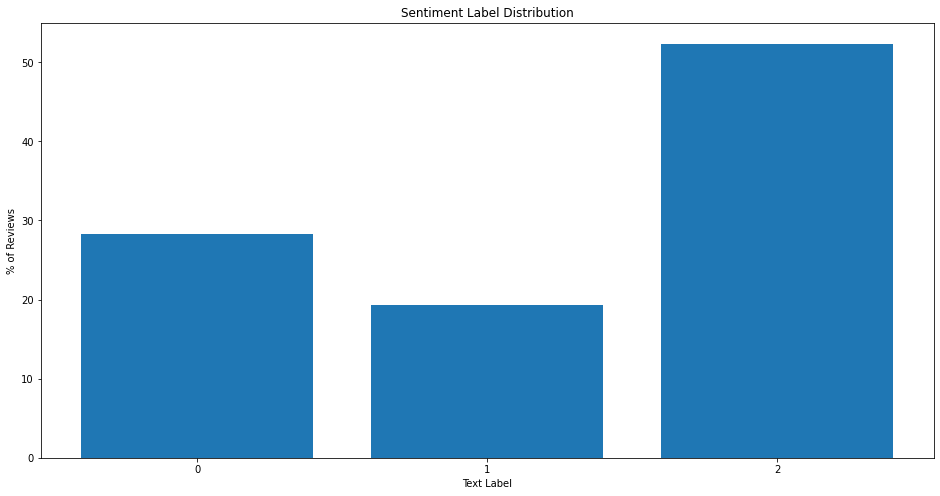

In [3]:
values, counts = np.unique(sentTrain['label'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure(figsize = (16,8))
plt.bar(values, normalized_counts*100)
plt.xlabel('Text Label')
plt.xticks([0,1,2])
plt.ylabel('% of Reviews')
plt.title("Sentiment Label Distribution")
plt.show()

In [4]:
# Provided to me during my Data Science diploma program

ENGLISH_STOP_WORDS = stopwords.words('english')

def customTokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    stemmer = nltk.stem.PorterStemmer()
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [5]:
X = sentTrain['text']
y = sentTrain['label']

In [6]:
if (os.path.exists('preRunModels/sentWordsVec.joblib')):
    sentWordsVec = joblib.load('preRunModels/sentWordsVec.joblib')
else:
    sentWordsVec = CountVectorizer(min_df = 75, 
                                   tokenizer = customTokenizer,
                                   ngram_range = (1,3),
                                   dtype = list)
    
    # Save the model result lists for loading in the futrure
    joblib.dump(sentWordsVec, 'preRunModels/sentWordsVec.joblib')
    
sentWordsVec.fit(X)
X_Vec = sentWordsVec.transform(X)

In [7]:
if (os.path.exists('preRunModels/sentWordsIdf.joblib')):
    sentWordsIdf = joblib.load('preRunModels/sentWordsIdf.joblib')
else:
    sentWordsIdf = TfidfVectorizer(min_df = 75, 
                                   tokenizer = customTokenizer,
                                   ngram_range = (1,3),
                                   strip_accents = 'ascii',
                                   dtype = list)
    # Save the model result lists for loading in the futrure
    joblib.dump(sentWordsIdf, 'preRunModels/sentWordsIdf.joblib')
    
sentWordsIdf.fit(X)
X_Idf = sentWordsIdf.transform(X)

In [8]:
VecDF = pd.DataFrame(columns = sentWordsVec.get_feature_names(), data = X_Vec.toarray())
VecDF['label'] = y
display(VecDF)

,\r\n\r\ni,\r\n\r\nthe,0,1,1 day,1 month,10,10 day,100,10000,...,your,youtub,yummi,zoom,…,🇺🇸,🇺🇸 gopdeb,🇺🇸 gopdeb gopdeb,👍,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
check = VecDF.loc[0]
check.where(check > 0, inplace = True)
check.dropna(inplace = True)
print(check)
print()
print(f"Original Text: {sentTrain.iloc[0,1]}")
print(f"Original Label: {sentTrain.iloc[0,2]}")

5000                   1.0
5000 mah               1.0
batteri                1.0
big                    1.0
camera                 1.0
camera qualiti         1.0
camera qualiti good    1.0
good                   2.0
good mobil             1.0
mah                    1.0
mobil                  1.0
qualiti                1.0
qualiti good           1.0
label                  2.0
Name: 0, dtype: float64

Original Text: good mobile. battery is 5000 mah is very big. camera quality very good.
Original Label: 2


In [10]:
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(16,8))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
    return words_df

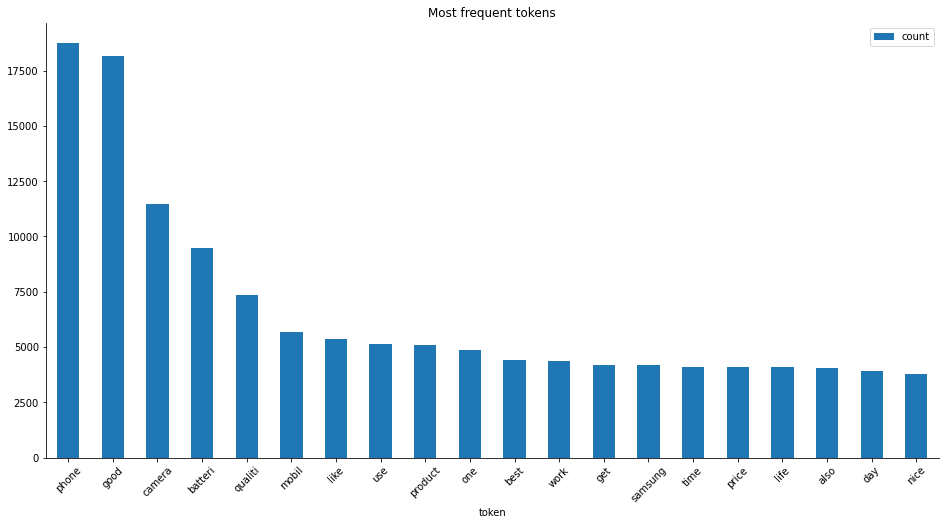

In [11]:
wordCountsVec = X_Vec.toarray().sum(axis=0)
wordsVec = sentWordsVec.get_feature_names()

wordsVecDF = plot_most_frequent(wordsVec, wordCountsVec)

In [12]:
IdfDF = pd.DataFrame(columns = sentWordsIdf.get_feature_names(), data = X_Idf.toarray())
IdfDF['label'] = y
display(IdfDF)

,\r\n\r\ni,\r\n\r\nthe,0,1,1 day,1 month,10,10 day,100,10000,...,year,yelp,yesterday,yet,youll,your,youtub,yummi,zoom,label
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.252649,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
49996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
check = IdfDF.loc[0]
check.where(check > 0, inplace = True)
check.dropna(inplace = True)
print(check)
print()
print(f"Original Text: {sentTrain.iloc[0,1]}")
print(f"Original Label: {sentTrain.iloc[0,2]}")

5000                   0.359667
5000 mah               0.378035
batteri                0.160454
big                    0.300573
camera                 0.153798
camera qualiti         0.224137
camera qualiti good    0.318046
good                   0.260738
good mobil             0.333613
mah                    0.327722
mobil                  0.195968
qualiti                0.175102
qualiti good           0.284338
label                  2.000000
Name: 0, dtype: float64

Original Text: good mobile. battery is 5000 mah is very big. camera quality very good.
Original Label: 2


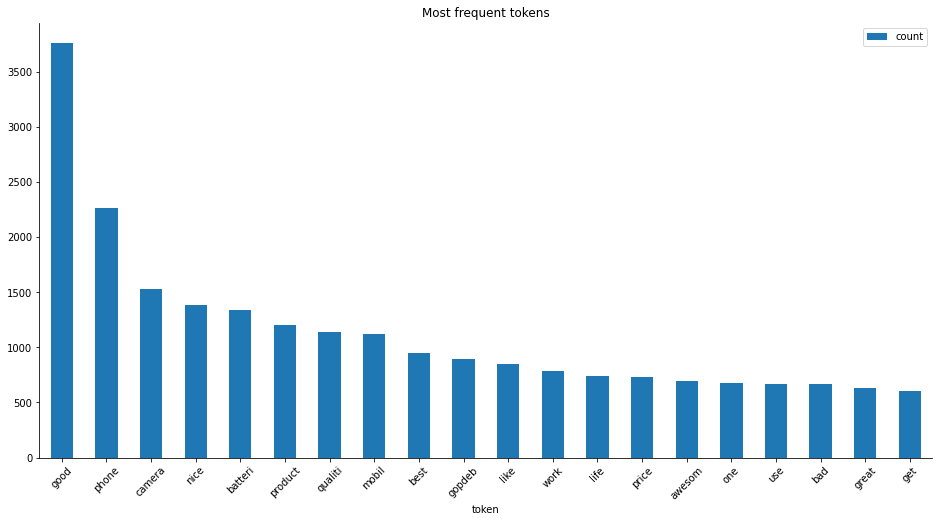

In [14]:
wordCountsIdf = X_Idf.toarray().sum(axis=0)
wordsIdf = sentWordsIdf.get_feature_names()

wrodsDF = plot_most_frequent(wordsIdf, wordCountsIdf)

In [15]:
XVec = VecDF.iloc[:, :-1]
yVec = VecDF.iloc[:,-1]
print(f"Shapes: {XVec.shape, yVec.shape}")

Shapes: ((50000, 1650), (50000,))


In [16]:
X_trainVec, X_valVec, y_trainVec, y_valVec = train_test_split(XVec, yVec, test_size=0.33, random_state=12)
print(f"Train Shapes: {X_trainVec.shape, y_trainVec.shape}")
print(f"Val Shapes: {X_valVec.shape, y_valVec.shape}")

Train Shapes: ((33500, 1650), (33500,))
Val Shapes: ((16500, 1650), (16500,))


In [17]:
valScores = []
trainScores = []
cVals = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores.joblib') & os.path.exists('preRunModels/trainScores.joblib') & os.path.exists('preRunModels/cVals.joblib')):
    valScores = joblib.load('preRunModels/valScores.joblib')
    trainScores = joblib.load('preRunModels/trainScores.joblib')
    cVals = joblib.load('preRunModels/cVals.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        my_logreg = LogisticRegression(solver='lbfgs', C = c, random_state = 12)
        my_logreg.fit(X_trainVec, y_trainVec)

        trainScores.append(my_logreg.score(X_trainVec, y_trainVec))
        valScores.append(my_logreg.score(X_valVec, y_valVec))
        cVals.append(c)
    
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores, 'preRunModels/valScores.joblib')
    joblib.dump(trainScores, 'preRunModels/trainScores.joblib')
    joblib.dump(cVals, 'preRunModels/cVals.joblib')
        
bestCValVec = cVals[np.argmax(valScores)]

Pre-run model will be loaded


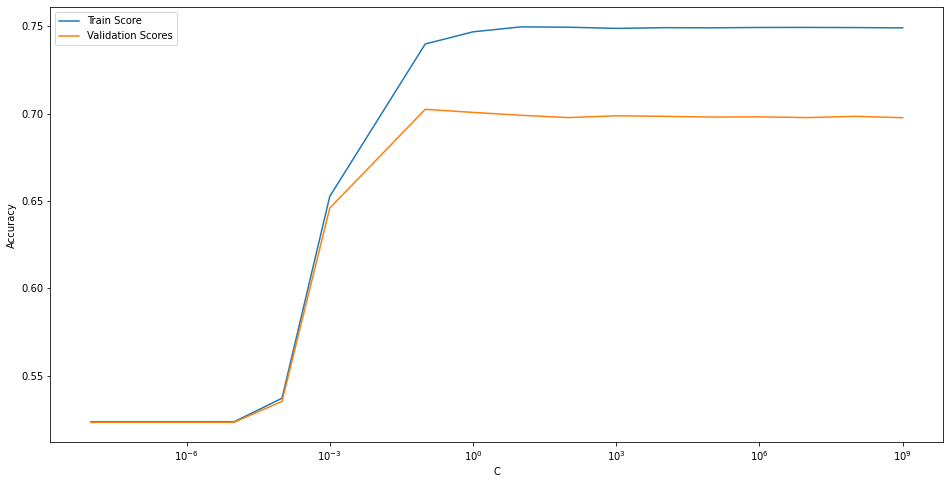

The c-calue with the highest validation score is 0.1


In [18]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores,label="Train Score")
plt.plot(C_range, valScores,label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-calue with the highest validation score is {bestCValVec}")

In [19]:
XIdf = IdfDF.iloc[:, :-1]
yIdf = IdfDF.iloc[:,-1]
print(f"Shapes: {XIdf.shape, yIdf.shape}")

Shapes: ((50000, 1647), (50000,))


In [20]:
X_trainIdf, X_valIdf, y_trainIdf, y_valIdf = train_test_split(XIdf, yIdf, test_size=0.33, random_state=12)
print(f"Train Shapes: {X_trainIdf.shape, y_trainIdf.shape}")
print(f"Val Shapes: {X_valIdf.shape, y_valIdf.shape}")

Train Shapes: ((33500, 1647), (33500,))
Val Shapes: ((16500, 1647), (16500,))


In [21]:
valScores2 = []
trainScores2 = []
cVals2 = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores2.joblib') & os.path.exists('preRunModels/trainScores2.joblib') & os.path.exists('preRunModels/cVals2.joblib')):
    valScores2 = joblib.load('preRunModels/valScores2.joblib')
    trainScores2 = joblib.load('preRunModels/trainScores2.joblib')
    cVals2 = joblib.load('preRunModels/cVals2.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        my_logreg = LogisticRegression(solver='lbfgs', C = c, random_state = 12)
        my_logreg.fit(X_trainIdf, y_trainIdf)

        trainScores2.append(my_logreg.score(X_trainIdf, y_trainIdf))
        valScores2.append(my_logreg.score(X_valIdf, y_valIdf))
        cVals2.append(c)
    
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores2, 'preRunModels/valScores2.joblib')
    joblib.dump(trainScores2, 'preRunModels/trainScores2.joblib')
    joblib.dump(cVals2, 'preRunModels/cVals2.joblib')
        
bestCValIdf = cVals2[np.argmax(valScores2)]

Pre-run model will be loaded


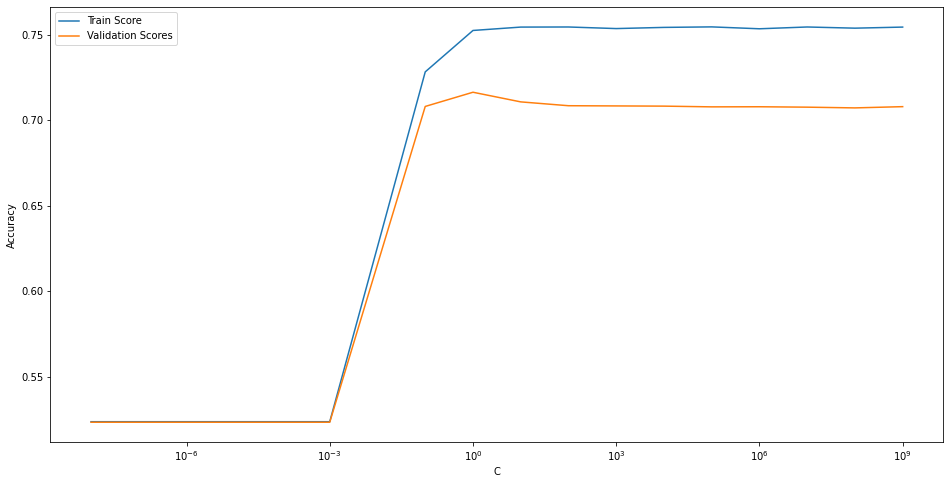

The c-calue with the highest validation score is 1.0


In [22]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores2, label="Train Score")
plt.plot(C_range, valScores2, label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-calue with the highest validation score is {bestCValIdf}")

In [23]:
logitVec = LogisticRegression(solver='lbfgs', C = bestCValVec, random_state = 12)

if (os.path.exists('preRunModels/logitVec.joblib')):
    logitVec = joblib.load('preRunModels/logitVec.joblib')
    print("Pre-run model will be loaded")
else:
    logitVec = logitVec.fit(X_trainVec, y_trainVec)
    joblib.dump(logitVec, 'preRunModels/logitVec.joblib')


print(f"Logestical Regression Vec Train: {logitVec.score(X_trainVec, y_trainVec)}")
print(f"Logestical Regression Vec Validation: {logitVec.score(X_valVec, y_valVec)}")

Pre-run model will be loaded
Logestical Regression Vec Train: 0.7398805970149254
Logestical Regression Vec Validation: 0.7024848484848485


In [24]:

logitIdf = LogisticRegression(solver='lbfgs', C = bestCValIdf, random_state = 12)
if (os.path.exists('preRunModels/logitIdf.joblib')):
    logitIdf = joblib.load('preRunModels/logitIdf.joblib')
    print("Pre-run model will be loaded")
else:
    logitIdf = logitIdf.fit(X_trainIdf, y_trainIdf)
    joblib.dump(logitIdf, 'preRunModels/logitIdf.joblib')

print(f"Logestical Regression IDF Train: {logitIdf.score(X_trainIdf, y_trainIdf)}")
print(f"Logestical Regression IDF Validation: {logitIdf.score(X_valIdf, y_valIdf)}")

Pre-run model will be loaded
Logestical Regression IDF Train: 0.7523880597014926
Logestical Regression IDF Validation: 0.7163636363636363


## Vec C-Value

In [25]:
valScores3 = []
trainScores3 = []
cVals3 = []
C_range = np.array([0.1,1,10,100])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores3.joblib') & os.path.exists('preRunModels/trainScores3.joblib') & os.path.exists('preRunModels/cVals3.joblib')):
    valScores3 = joblib.load('preRunModels/valScores3.joblib')
    trainScores3 = joblib.load('preRunModels/trainScores3.joblib')
    cVals3 = joblib.load('preRunModels/cVals3.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
        svcVec = SVC(C = c, random_state = 12)
        svcVec.fit(X_trainVec, y_trainVec)

        trainScores3.append(svcVec.score(X_trainVec, y_trainVec))
        valScores3.append(svcVec.score(X_valVec, y_valVec))
        cVals3.append(c)
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores3, 'preRunModels/valScores3.joblib')
    joblib.dump(trainScores3, 'preRunModels/trainScores3.joblib')
    joblib.dump(cVals3, 'preRunModels/cVals3.joblib')
        
bestCValVecSvc = cVals3[np.argmax(valScores3)]

Pre-run model will be loaded


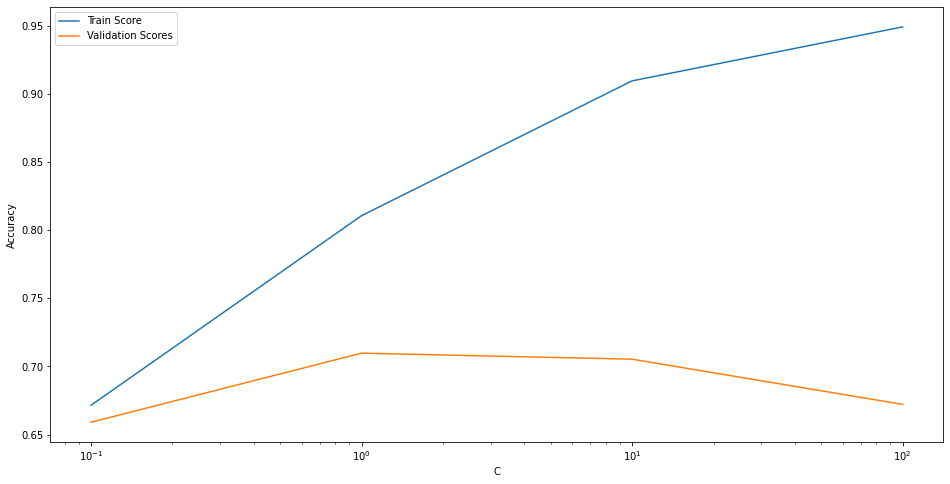

The c-value with the highest validation score is 1.0


In [26]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores3, label="Train Score")
plt.plot(C_range, valScores3, label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-value with the highest validation score is {bestCValVecSvc}")

## IDF C-Value

In [27]:
valScores31 = []
trainScores31 = []
cVals31 = []
C_range = np.array([0.1,1,10,100])

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/valScores3.joblib') & 
    os.path.exists('preRunModels/trainScores31.joblib') & 
    os.path.exists('preRunModels/cVals3.joblib')):
    valScores31 = joblib.load('preRunModels/valScores31.joblib')
    trainScores31 = joblib.load('preRunModels/trainScores31.joblib')
    cVals31 = joblib.load('preRunModels/cVals31.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    for c in C_range:
        # Print progress through the loop
        print(f"C={c}", end="\r")
        
        svcIdf = SVC(C = c, random_state = 12)
        svcIdf.fit(X_trainIdf, y_trainIdf)

        trainScores31.append(svcIdf.score(X_trainIdf, y_trainIdf))
        valScores31.append(svcIdf.score(X_valIdf, y_valIdf))
        cVals31.append(c)
        
    # Save the model result lists for loading in the futrure
    joblib.dump(valScores31, 'preRunModels/valScores31.joblib')
    joblib.dump(trainScores31, 'preRunModels/trainScores31.joblib')
    joblib.dump(cVals31, 'preRunModels/cVals31.joblib')
        
bestCValIdfSvc = cVals31[np.argmax(valScores31)]

Pre-run model will be loaded


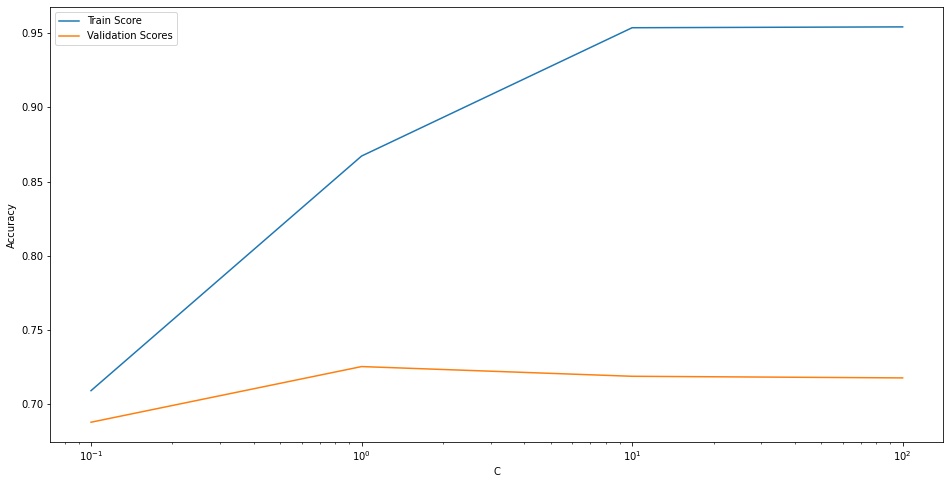

The c-value with the highest validation score is 1.0


In [28]:
plt.figure(figsize = (16,8))
plt.plot(C_range, trainScores31, label="Train Score")
plt.plot(C_range, valScores31, label="Validation Scores")
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The c-value with the highest validation score is {bestCValIdfSvc}")

## SVC Models

In [29]:
svcVecNlp = SVC(C = bestCValVecSvc, random_state = 12)
if os.path.exists('preRunModels/svcVecNlp.joblib'):
    svcVecNlp = joblib.load('preRunModels/svcVecNlp.joblib')
else:
    svcVecNlp = svcVecNlp.fit(X_trainVec, y_trainVec)
    joblib.dump(svcVecNlp, 'preRunModels/svcVecNlp.joblib')

if os.path.exists('preRunModels/svcVecNlpTrainScore.joblib'):
    svcVecNlpTrainScore = joblib.load('preRunModels/svcVecNlpTrainScore.joblib')
else:
    svcVecNlpTrainScore = svcVecNlp.score(X_trainVec, y_trainVec)
    joblib.dump(svcVecNlpTrainScore, 'preRunModels/svcVecNlpTrainScore.joblib')

if os.path.exists('preRunModels/svcVecNlpValScore.joblib'):
    svcVecNlpValScore = joblib.load('preRunModels/svcVecNlpValScore.joblib')
else:
    svcVecNlpValScore = svcVecNlp.score(X_valVec, y_valVec)
    joblib.dump(svcVecNlpValScore, 'preRunModels/svcVecNlpValScore.joblib')

print(f"SVC Vec Train: {svcVecNlpTrainScore}")
print(f"SVC Vec Validation: {svcVecNlpValScore}",end= "\n")

print()

svcIdfNlp = SVC(C = bestCValIdfSvc, random_state = 12)
if os.path.exists('preRunModels/svcIdfNlp.joblib'):
    svcIdfNlp = joblib.load('preRunModels/svcIdfNlp.joblib')
else:
    svcIdfNlp = svcIdfNlp.fit(X_trainIdf, y_trainIdf)
    joblib.dump(svcIdfNlp, 'preRunModels/svcIdfNlp.joblib')

if os.path.exists('preRunModels/svcIdfNlpTrainScore.joblib'):
    svcIdfNlpTrainScore = joblib.load('preRunModels/svcIdfNlpTrainScore.joblib')
else:
    svcIdfNlpTrainScore = svcIdfNlp.score(X_trainIdf, y_trainIdf)
    joblib.dump(svcIdfNlpTrainScore, 'preRunModels/svcIdfNlpTrainScore.joblib')

if os.path.exists('preRunModels/svcIdfNlpValScore.joblib'):
    svcIdfNlpValScore = joblib.load('preRunModels/svcIdfNlpValScore.joblib')
else:
    svcIdfNlpValScore = svcIdfNlp.score(X_valIdf, y_valIdf)
    joblib.dump(svcIdfNlpValScore, 'preRunModels/svcIdfNlpValScore.joblib')

print(f"SVC IDF Train: {svcIdfNlpTrainScore}")
print(f"SVC IDF Validation: {svcIdfNlpValScore}")

SVC Vec Train: 0.8105970149253732
SVC Vec Validation: 0.7097575757575758

SVC IDF Train: 0.8672238805970149
SVC IDF Validation: 0.7253333333333334


## Vec K-Values broad

In [30]:
# Empty lists to store iteration results
valScores4 = []
trainScores4 = []
K_values4 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores4.joblib') & 
    os.path.exists('preRunModels/valScores4.joblib') & 
    os.path.exists('preRunModels/kValues4.joblib')):
    trainScores4 = joblib.load('preRunModels/trainScores4.joblib')
    valScores4 = joblib.load('preRunModels/valScores4.joblib')
    K_values4 = joblib.load('preRunModels/kValues4.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1, 10000, 100):

        # Train and fit model with testing number of neighbors
        knnVec = KNeighborsClassifier(n_neighbors=k).fit(X_trainVec, y_trainVec)

        # Save model predictions and the relative number of neighbors to lists
        trainScores4.append(knnVec.score(X_trainVec, y_trainVec))
        valScores4.append(knnVec.score(X_valVec, y_valVec))
        K_values4.append(k)

    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores4, 'preRunModels/trainScores4.joblib')
    joblib.dump(valScores4, 'preRunModels/valScores4.joblib')
    joblib.dump(K_values4, 'preRunModels/kValues4.joblib')
    
bestKValVecKnn = K_values4[np.argmax(valScores4)]

Pre-run model will be loaded


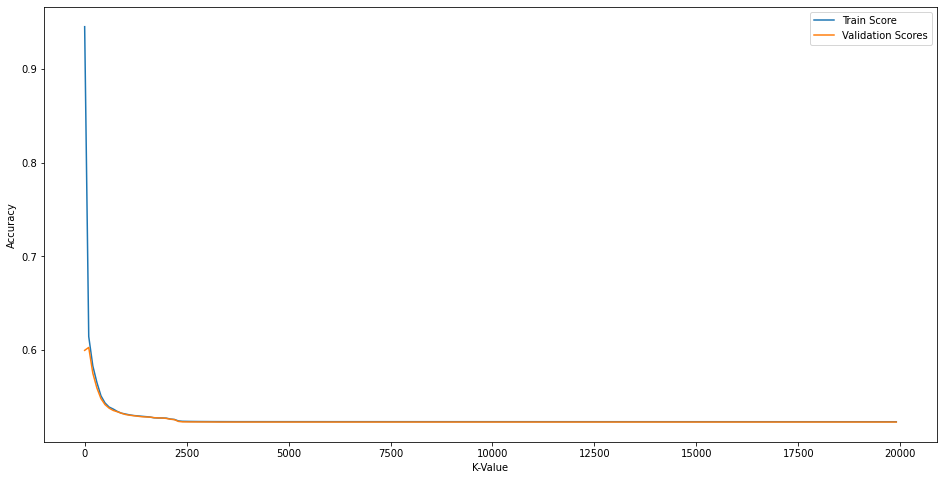

The K-Value with the highest validation score is 101


In [31]:
plt.figure(figsize = (16,8))
plt.plot(K_values4, trainScores4, label="Train Score")
plt.plot(K_values4, valScores4, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest validation score is {bestKValVecKnn}")

## Vec K-Values narrow

In [32]:
# Empty lists to store iteration results
valScores5 = []
trainScores5 = []
K_values5 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores5.joblib') & 
    os.path.exists('preRunModels/valScores5.joblib') & 
    os.path.exists('preRunModels/k_Values5.joblib')):
    trainScores5 = joblib.load('preRunModels/trainScores5.joblib')
    valScores5 = joblib.load('preRunModels/valScores5.joblib')
    K_values5 = joblib.load('preRunModels/K_values5.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1,120):

        # Train and fit model with testing number of neighbors
        knnVec = KNeighborsClassifier(n_neighbors=k).fit(X_trainVec, y_trainVec)

        # Train and fit model with testing number of neighbors
        knnVec = KNeighborsClassifier(n_neighbors=k).fit(X_trainVec, y_trainVec)

        # Save model predictions and the relative number of neighbors to lists
        trainScores5.append(knnVec.score(X_trainVec, y_trainVec))
        valScores5.append(knnVec.score(X_valVec, y_valVec))
        Kvalues5.append(k)
    
    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores5, 'preRunModels/trainScores5.joblib')
    joblib.dump(valScores5, 'preRunModels/valScores5.joblib')
    joblib.dump(K_values5, 'preRunModels/K_values5.joblib')
    
bestKValVecKnn = K_values5[np.argmax(valScores5)]

Pre-run model will be loaded


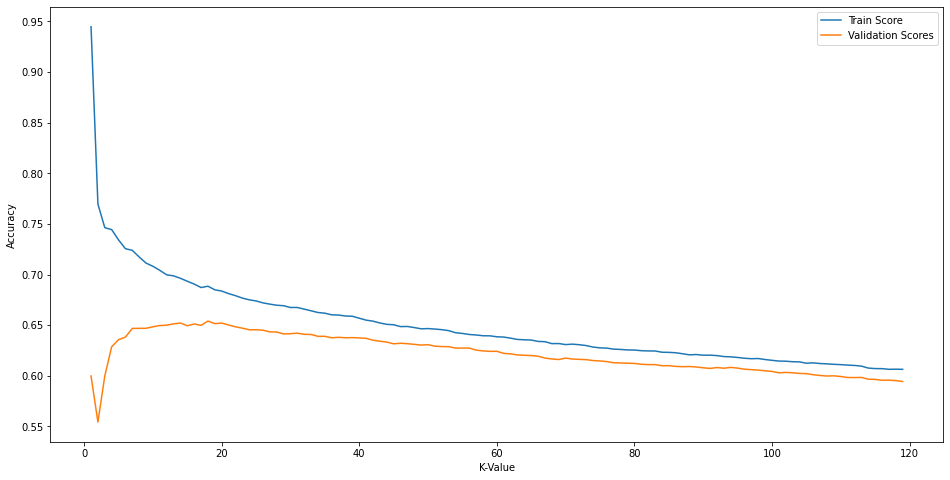

The K-Value with the highest validation score is 18


In [33]:
plt.figure(figsize = (16,8))
plt.plot(K_values5, trainScores5, label="Train Score")
plt.plot(K_values5, valScores5, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest validation score is {bestKValVecKnn}")

## IDF K-Values broad

In [34]:
# Empty lists to store iteration results
trainScores41 = []
valScores41 = []
K_values41 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores41.joblib') & 
    os.path.exists('preRunModels/valScores41.joblib') & 
    os.path.exists('preRunModels/k_Values41.joblib')):
    trainScores41 = joblib.load('preRunModels/trainScores41.joblib')
    valScores41 = joblib.load('preRunModels/valScores41.joblib')
    K_values41 = joblib.load('preRunModels/k_Values41.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1, 10000, 100):

        # Train and fit model with testing number of neighbors
        knnVec = KNeighborsClassifier(n_neighbors=k).fit(X_trainIdf, y_trainIdf)

        # Save model predictions and the relative number of neighbors to lists
        trainScores41.append(knnVec.score(X_trainIdf, y_trainIdf))
        valScores41.append(knnVec.score(X_valIdf, y_valIdf))
        K_values41.append(k)

    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores41, 'preRunModels/trainScores41.joblib')
    joblib.dump(valScores41, 'preRunModels/valScores41.joblib')
    joblib.dump(K_values41, 'preRunModels/k_Values41.joblib')
    
bestKValIdfKnn = K_values41[np.argmax(valScores41)]

Pre-run model will be loaded


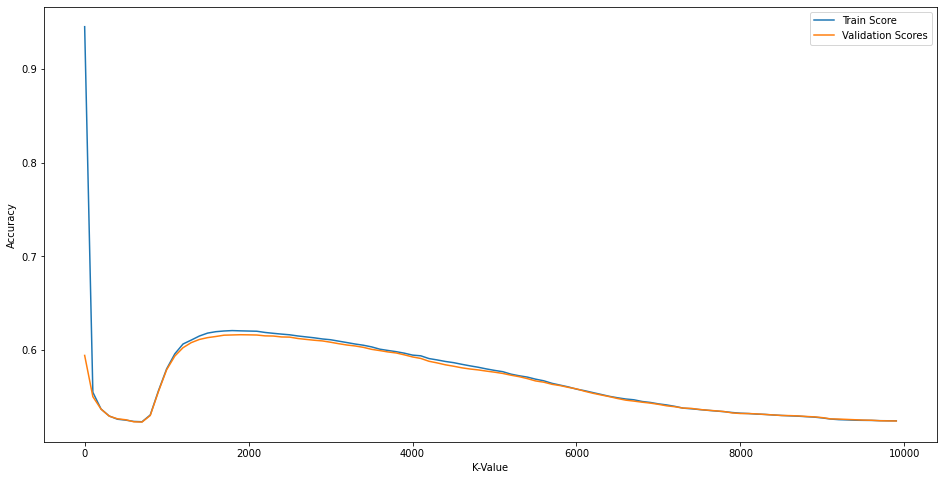

The K-Value with the highest validation score is 1901


In [35]:
plt.figure(figsize = (16,8))
plt.plot(K_values41, trainScores41, label="Train Score")
plt.plot(K_values41, valScores41, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest validation score is {bestKValIdfKnn}")

## IDF K-Values narrow

In [36]:
# Empty lists to store iteration results
trainScores51 = []
valScores51 = []
K_values51 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores51.joblib') & 
    os.path.exists('preRunModels/valScores51.joblib') & 
    os.path.exists('preRunModels/K_values51.joblib')):
    trainScores51 = joblib.load('preRunModels/trainScores51.joblib')
    valScores51 = joblib.load('preRunModels/valScores51.joblib')
    K_values51 = joblib.load('preRunModels/K_values51.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # for a range the size of the total data points we have in steps of 100
    for k in range(1800, 2000):
        print(f"K={k}")
        # Train and fit model with testing number of neighbors
        knnVec = KNeighborsClassifier(n_neighbors=k).fit(X_trainIdf, y_trainIdf)

        # Save model predictions and the relative number of neighbors to lists
        trainScores51.append(knnVec.score(X_trainIdf, y_trainIdf))
        valScores51.append(knnVec.score(X_valIdf, y_valIdf))
        K_values51.append(k)

    # Save the model result lists for loading in the futrure
    joblib.dump(trainScores51, 'preRunModels/trainScores51.joblib')
    joblib.dump(valScores51, 'preRunModels/valScores51.joblib')
    joblib.dump(K_values51, 'preRunModels/K_values51.joblib')
    
bestKValIdfKnn = K_values51[np.argmax(valScores51)]

Pre-run model will be loaded


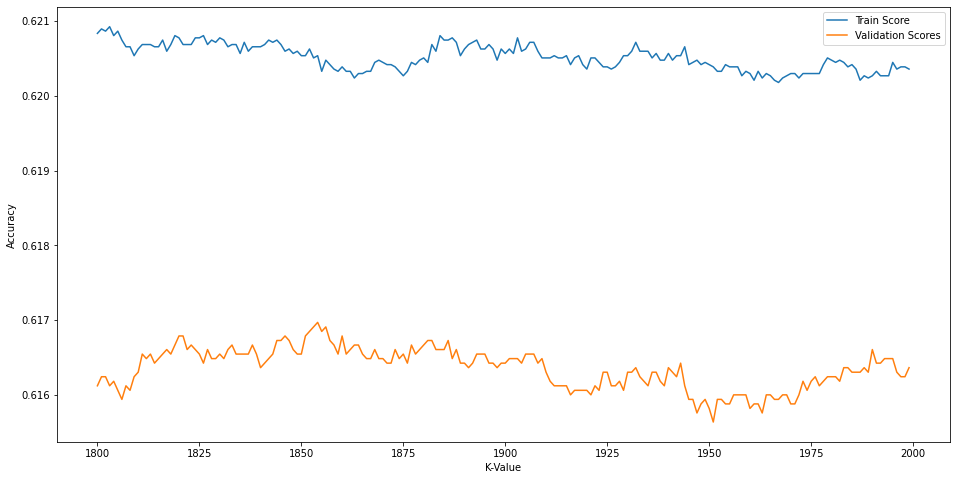

The K-Value with the highest validation score is 1854


In [37]:
plt.figure(figsize = (16,8))
plt.plot(K_values51, trainScores51, label="Train Score")
plt.plot(K_values51, valScores51, label="Validation Scores")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The K-Value with the highest validation score is {bestKValIdfKnn}")

## KNN Models

In [38]:
knnVecNlp = KNeighborsClassifier(n_neighbors=bestKValVecKnn).fit(X_trainVec, y_trainVec)
svcVecNlpTrainScore = knnVecNlp.score(X_trainVec, y_trainVec)
svcVecNlpValScore = knnVecNlp.score(X_valVec, y_valVec)

print(f"KNN Vec Train: {svcVecNlpTrainScore}")
print(f"KNN Vec Validation: {svcVecNlpValScore}")
print()

knnIdfNlp = KNeighborsClassifier(n_neighbors=bestKValIdfKnn).fit(X_trainIdf, y_trainIdf)
svcIdfNlpTrainScore = knnIdfNlp.score(X_trainIdf, y_trainIdf)
svcIdfNlpValScore = knnIdfNlp.score(X_valIdf, y_valIdf)

print(f"KNN IDF Train: {svcIdfNlpTrainScore}")
print(f"KNN IDF Validation: {svcIdfNlpValScore}")

KNN Vec Train: 0.6884776119402986
KNN Vec Validation: 0.654060606060606

KNN IDF Train: 0.6205373134328358
KNN IDF Validation: 0.616969696969697


## Vec Min Values

In [39]:
# Range to loop through from 1-20000
minSamples = np.arange(1, 125)
# Empty lists to store results for graphing
trainScores6 = []
valScores6 = []
min_value6 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores6.joblib') & 
    os.path.exists('preRunModels/valScores6.joblib') & 
    os.path.exists('preRunModels/min_value6.joblib')):
    trainScores6 = joblib.load('preRunModels/trainScores6.joblib')
    valScores6 = joblib.load('preRunModels/valScores6.joblib')
    min_value6 = joblib.load('preRunModels/min_value6.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for minS in minSamples:
        # Compile, train, and fit the model and data
        dtVec = DecisionTreeClassifier(min_samples_leaf = minS, random_state=12)
        dtVec.fit(X_trainVec, y_trainVec)

        trainScores6.append(dtVec.score(X_trainVec, y_trainVec))
        valScores6.append(dtVec.score(X_valVec, y_valVec))
        min_value6.append(minS)
        
        # Print the progress of the loop
        print(f"min samples={minS}")
        
    # SAve teh results lists to file
    joblib.dump(trainScores6, 'preRunModels/trainScores6.joblib')
    joblib.dump(valScores6, 'preRunModels/valScores6.joblib')
    joblib.dump(min_value6, 'preRunModels/min_value6.joblib')
    
bestMinValVecDt = min_value6[np.argmax(valScores6)]

Pre-run model will be loaded


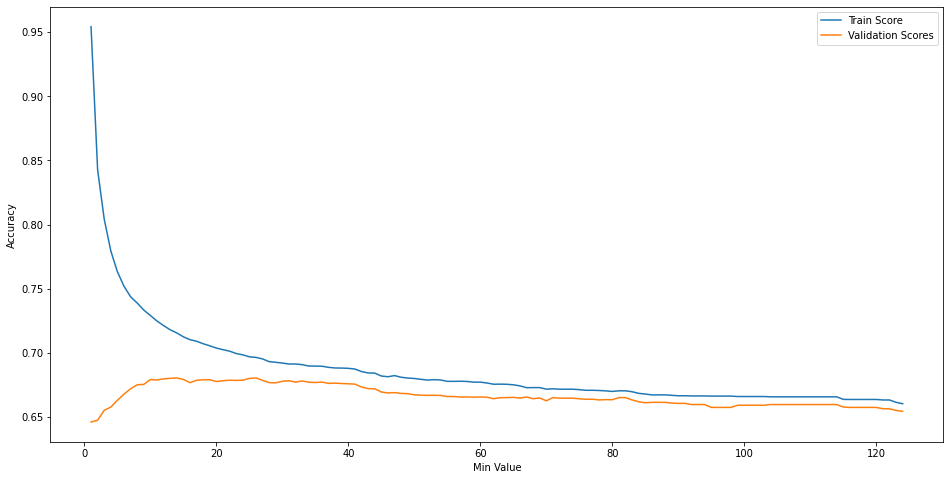

The Min Value with the highest validation score is 14


In [40]:
plt.figure(figsize = (16,8))
plt.plot(min_value6, trainScores6, label="Train Score")
plt.plot(min_value6, valScores6, label="Validation Scores")
plt.xlabel('Min Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Min Value with the highest validation score is {bestMinValVecDt}")

## IDF Min Values

In [41]:
# Range to loop through from 1-20000
minSamples = np.arange(1, 200)
# Empty lists to store results for graphing
trainScores61 = []
valScores61 = []
min_value61 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores61.joblib') & 
    os.path.exists('preRunModels/valScores61.joblib') & 
    os.path.exists('preRunModels/min_value61.joblib')):
    trainScores61 = joblib.load('preRunModels/trainScores61.joblib')
    valScores61 = joblib.load('preRunModels/valScores61.joblib')
    min_value61 = joblib.load('preRunModels/min_value61.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for minS in minSamples:
        # Compile, train, and fit the model and data
        dtIdf = DecisionTreeClassifier(min_samples_leaf = minS, random_state=12)
        dtIdf.fit(X_trainIdf, y_trainIdf)

        # Score the model predictions
        trainScores61.append(dtIdf.score(X_trainIdf, y_trainIdf))
        valScores61.append(dtIdf.score(X_valIdf, y_valIdf))
        min_value61.append(minS)
        
        # Print the progress of the loop
        print(f"min samples={minS}")
        
    # SAve teh results lists to file
    joblib.dump(trainScores61, 'preRunModels/trainScores61.joblib')
    joblib.dump(valScores61, 'preRunModels/valScores61.joblib')
    joblib.dump(min_value61, 'preRunModels/min_value61.joblib')
    
bestMinValIdfDt = min_value61[np.argmax(valScores61)]

Pre-run model will be loaded


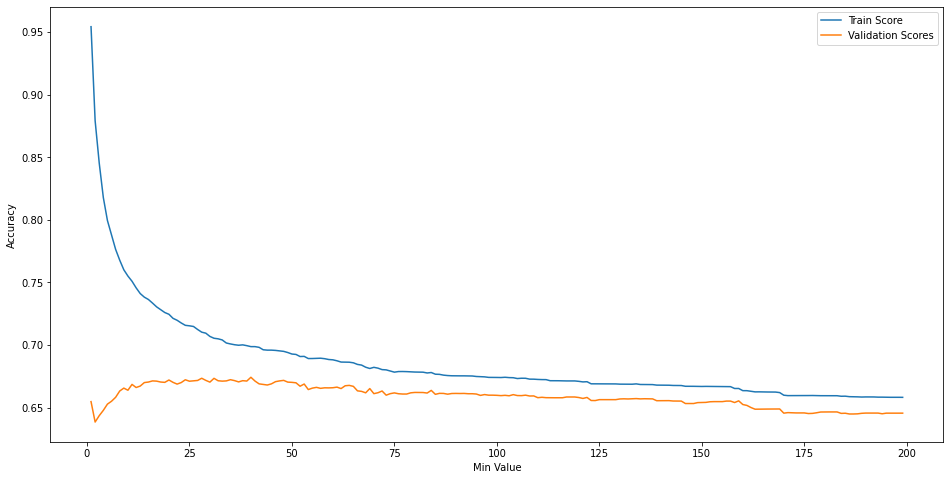

The Min Value with the highest validation score is 40


In [42]:
plt.figure(figsize = (16,8))
plt.plot(min_value61, trainScores61, label="Train Score")
plt.plot(min_value61, valScores61, label="Validation Scores")
plt.xlabel('Min Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Min Value with the highest validation score is {bestMinValIdfDt}")

## Vec Depths

In [43]:
# Range to loop through from 1-50
depths = np.arange(1, 201)
# Empty lists to store results for graphing
trainScores7 = []
valScores7 = []
depth_value7 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores7.joblib') & 
    os.path.exists('preRunModels/valScores7.joblib') & 
    os.path.exists('preRunModels/depth_value7.joblib')):
    trainScores7 = joblib.load('preRunModels/trainScores7.joblib')
    valScores7 = joblib.load('preRunModels/valScores7.joblib')
    depth_value7 = joblib.load('preRunModels/depth_value7.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for depth in depths:
        # Compile, train, and fit the model and data
        dtVec = DecisionTreeClassifier(max_depth = depth, 
                                       min_samples_leaf = bestMinValVecDt, 
                                       random_state=12)
        dtVec.fit(X_trainVec, y_trainVec)

        # Score the model predictions
        trainScores7.append(dtVec.score(X_trainVec, y_trainVec))
        valScores7.append(dtVec.score(X_valVec, y_valVec))
        depth_value7.append(depth)
        
        # Print the progress of the loop
        print(f"depth={depth}")
        
    # SAve teh results lists to file
    joblib.dump(trainScores7, 'preRunModels/trainScores7.joblib')
    joblib.dump(valScores7, 'preRunModels/valScores7.joblib')
    joblib.dump(depth_value7, 'preRunModels/depth_value7.joblib')
    
bestDepthValVecDt = depth_value7[np.argmax(valScores7)]

Pre-run model will be loaded


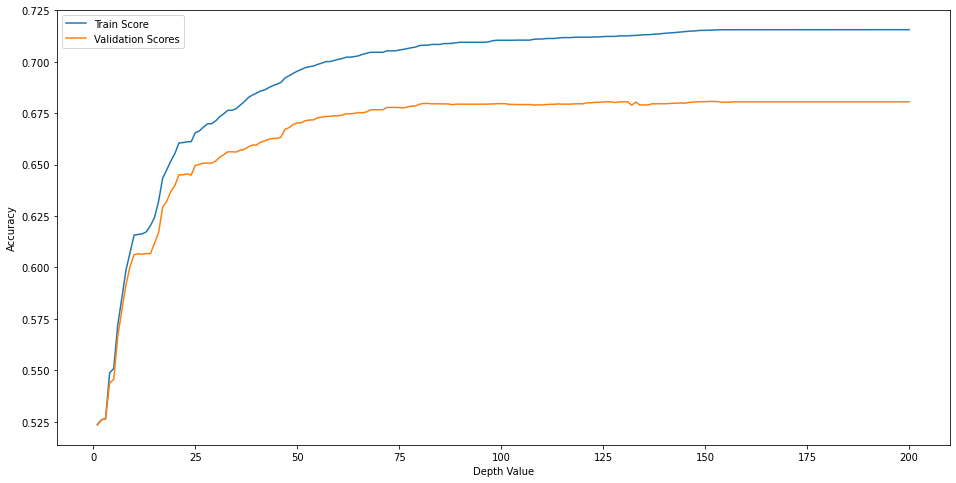

The Depth Value with the highest validation score is 151


In [44]:
plt.figure(figsize = (16,8))
plt.plot(depth_value7, trainScores7, label="Train Score")
plt.plot(depth_value7, valScores7, label="Validation Scores")
plt.xlabel('Depth Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Depth Value with the highest validation score is {bestDepthValVecDt}")

## IDF Depths

In [45]:
# Range to loop through from 1-50
depths = np.arange(1, 201)
# Empty lists to store results for graphing
trainScores71 = []
valScores71 = []
depth_value71 = []

# Check to see if a pre-run model exists - done to save time when re-running and testing the project
if (os.path.exists('preRunModels/trainScores71.joblib') & 
    os.path.exists('preRunModels/valScores71.joblib') & 
    os.path.exists('preRunModels/depth_value71.joblib')):
    trainScores71 = joblib.load('preRunModels/trainScores71.joblib')
    valScores71 = joblib.load('preRunModels/valScores71.joblib')
    depth_value71 = joblib.load('preRunModels/depth_value71.joblib')
    print("Pre-run model will be loaded")
# If no pre-run models exist...
else:
    # For each number from 1-20000....
    for depth in depths:
        # Compile, train, and fit the model and data
        dtIdf = DecisionTreeClassifier(max_depth = depth, 
                                       min_samples_leaf = bestMinValIdfDt, 
                                       random_state=12)
        dtIdf.fit(X_trainIdf, y_trainIdf)

        # Score the model predictions
        trainScores71.append(dtIdf.score(X_trainIdf, y_trainIdf))
        valScores71.append(dtIdf.score(X_valIdf, y_valIdf))
        depth_value71.append(depth)
        
        # Print the progress of the loop
        print(f"depth={depth}")
        
    # SAve teh results lists to file
    joblib.dump(trainScores71, 'preRunModels/trainScores71.joblib')
    joblib.dump(valScores71, 'preRunModels/valScores71.joblib')
    joblib.dump(depth_value71, 'preRunModels/depth_value71.joblib')
    
bestDepthValIdfDt = depth_value71[np.argmax(valScores71)]

Pre-run model will be loaded


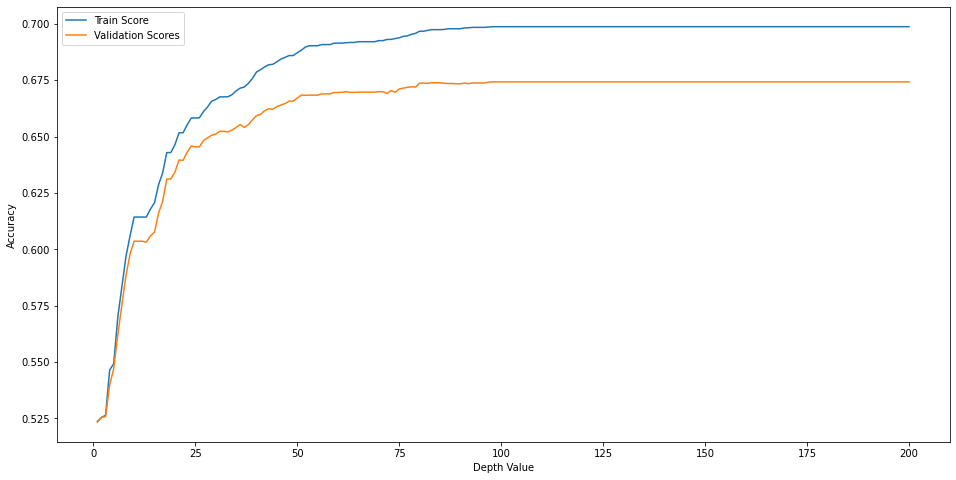

The Depth Value with the highest validation score is 98


In [46]:
plt.figure(figsize = (16,8))
plt.plot(depth_value71, trainScores71, label="Train Score")
plt.plot(depth_value71, valScores71, label="Validation Scores")
plt.xlabel('Depth Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(f"The Depth Value with the highest validation score is {bestDepthValIdfDt}")

## Decision Tree Models

In [47]:
dtVecNlp = DecisionTreeClassifier(max_depth = bestDepthValVecDt, min_samples_leaf = bestMinValVecDt, random_state=12).fit(X_trainVec, y_trainVec)
dtVecTrain = dtVecNlp.score(X_trainVec, y_trainVec)
dtVecVal = dtVecNlp.score(X_valVec, y_valVec)
print(f"Decision Tree Vec Train: {dtVecTrain}")
print(f"Decision Tree Vec Validation: {dtVecVal}")

print()

dtIdfNlp = DecisionTreeClassifier(max_depth = bestDepthValIdfDt, min_samples_leaf = bestMinValIdfDt, random_state=12).fit(X_trainIdf, y_trainIdf)
dtIdfTrain = dtIdfNlp.score(X_trainIdf, y_trainIdf)
dtIdfVal = dtIdfNlp.score(X_valIdf, y_valIdf)
print(f"Decision Tree IDF Train: {dtIdfTrain}")
print(f"Decision Tree IDF Validation: {dtIdfVal}")


Decision Tree Vec Train: 0.7153731343283583
Decision Tree Vec Validation: 0.6807272727272727

Decision Tree IDF Train: 0.6987164179104478
Decision Tree IDF Validation: 0.6742424242424242


## Multinominal Naive Bayes

In [48]:
nbVecNlp = MultinomialNB().fit(X_trainVec, y_trainVec)
nbVecTrain = nbVecNlp.score(X_trainVec, y_trainVec)
nbVecVal = nbVecNlp.score(X_valVec, y_valVec)
print(f"Multinominal Naive Bayes Vec Train: {nbVecTrain}")
print(f"Multinominal Naive Bayes Vec Validation: {nbVecVal}")

print()

nbIdfNlp = MultinomialNB().fit(X_trainIdf, y_trainIdf)
nbIdfTrain = nbIdfNlp.score(X_trainIdf, y_trainIdf)
nbIdfVal = nbIdfNlp.score(X_valIdf, y_valIdf)
print(f"Multinominal Naive Bayes Idf Train: {nbIdfTrain}")
print(f"Multinominal Naive Bayes Idf Validation: {nbIdfVal}")

Multinominal Naive Bayes Vec Train: 0.707134328358209
Multinominal Naive Bayes Vec Validation: 0.686969696969697

Multinominal Naive Bayes Idf Train: 0.7162686567164179
Multinominal Naive Bayes Idf Validation: 0.6947878787878788


In [49]:
vecModels = [
    LogisticRegression(solver='lbfgs', C = bestCValVec, random_state = 12),
    SVC(C = bestCValVecSvc, random_state = 12),
    KNeighborsClassifier(n_neighbors=bestKValVecKnn),
    DecisionTreeClassifier(max_depth = bestDepthValVecDt, min_samples_leaf = bestMinValVecDt, random_state=12),
    MultinomialNB()
]

idfModels = [
    LogisticRegression(solver='lbfgs', C = bestCValIdf, random_state = 12),
    SVC(C = bestCValIdfSvc, random_state = 12),
    KNeighborsClassifier(n_neighbors=bestKValIdfKnn),
    DecisionTreeClassifier(max_depth = bestDepthValIdfDt, min_samples_leaf = bestMinValIdfDt, random_state=12),
    MultinomialNB()
]

CV = 10

cvIdfDF = pd.DataFrame(index=range(CV*len(idfModels)))
resultsIdf = []
resultsVec = []

if (os.path.exists('preRunModels/resultsIdf.joblib') & os.path.exists('preRunModels/accuraciesIdf.joblib')):
    accuraciesIdf = joblib.load('preRunModels/accuraciesIdf.joblib')
    resultsIdf = joblib.load('preRunModels/resultsIdf.joblib')
else:
    for model in idfModels:
        modelName = model.__class__.__name__
        print(modelName)
        accuraciesIdf = cross_val_score(model, X_valIdf, y_valIdf, scoring = 'accuracy', cv = CV)
        for foldIndex, accuracy in enumerate(accuraciesIdf):
            resultsIdf.append((modelName, foldIndex, accuracy))

    joblib.dump(accuraciesIdf, 'preRunModels/accuraciesIdf.joblib')
    joblib.dump(resultsIdf, 'preRunModels/resultsIdf.joblib')

cvIdfDF = pd.DataFrame(resultsIdf, columns = ['Model Name', 'Fold Index', 'Accuracy'])

if (os.path.exists('preRunModels/resultsVec.joblib') & os.path.exists('preRunModels/accuraciesVec.joblib')):
    accuraciesVec = joblib.load('preRunModels/accuraciesVec.joblib')
    resultsVec = joblib.load('preRunModels/resultsVec.joblib')
else:
    cvVecDF = pd.DataFrame(index=range(CV*len(vecModels)))
    resultsVec = []
    for model in vecModels:
        modelName = model.__class__.__name__
        print(modelName)
        accuraciesVec = cross_val_score(model, X_valVec, y_valVec, scoring = 'accuracy', cv = CV)
        for foldIndex, accuracy in enumerate(accuraciesVec):
            resultsVec.append((modelName, foldIndex, accuracy))

    joblib.dump(accuraciesVec, 'preRunModels/accuraciesVec.joblib')
    joblib.dump(resultsVec, 'preRunModels/resultsVec.joblib')

cvVecDF = pd.DataFrame(resultsVec, columns = ['Model Name', 'Fold Index', 'Accuracy'])


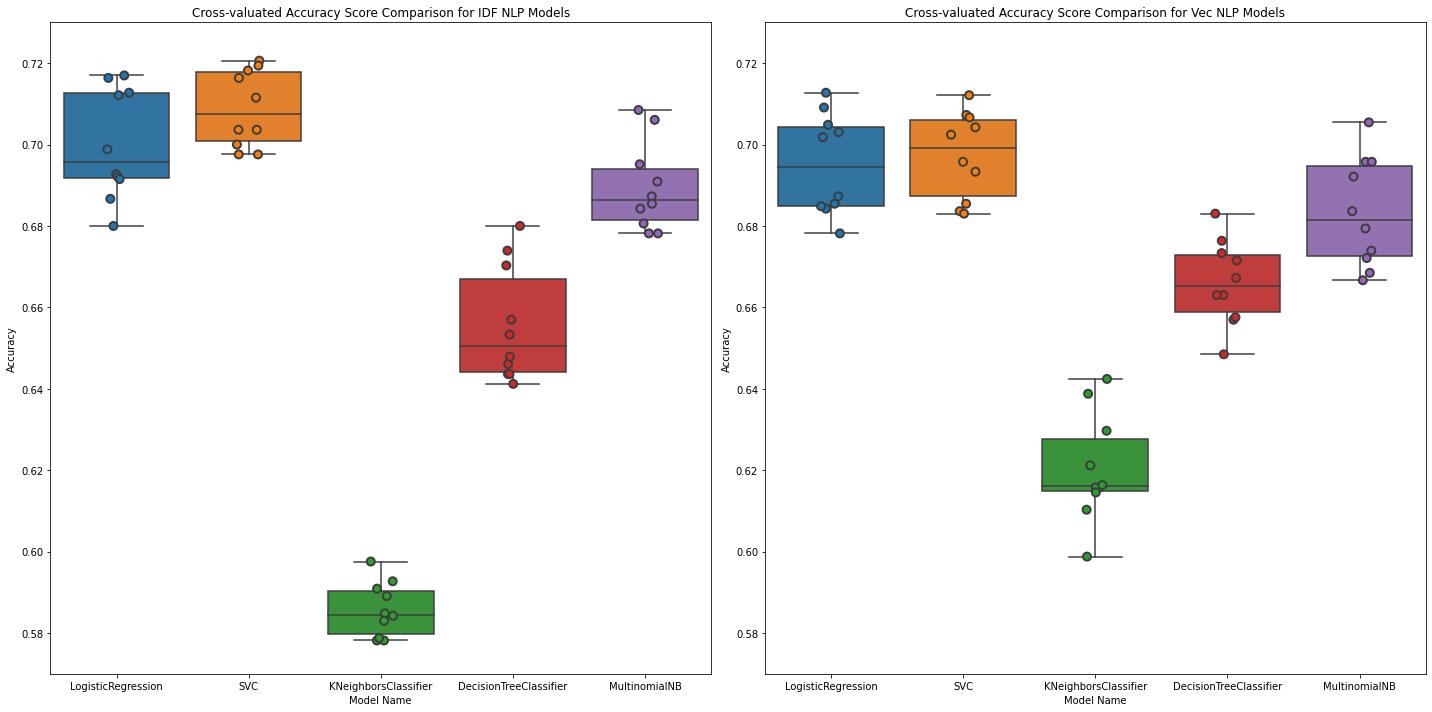

In [50]:
plt.figure(figsize = (20,10), tight_layout = True)

plt.subplot(1,2,1)
plt.title('Cross-valuated Accuracy Score Comparison for IDF NLP Models')
plt.ylim([0.57,0.73])
sns.boxplot(x='Model Name', y='Accuracy', data = cvIdfDF)
sns.stripplot(x='Model Name', y='Accuracy', data = cvIdfDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.subplot(1,2,2)
plt.title('Cross-valuated Accuracy Score Comparison for Vec NLP Models')
plt.ylim([0.57,0.73])
sns.boxplot(x='Model Name', y='Accuracy', data = cvVecDF)
sns.stripplot(x='Model Name', y='Accuracy', data = cvVecDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [51]:
tokenIdfDF = cvIdfDF.rename(columns = {'Model Name':'Tokenizer'})
tokenVecDF = cvVecDF.rename(columns = {'Model Name':'Tokenizer'})

In [52]:
logDF = tokenIdfDF[tokenIdfDF['Tokenizer'] == 'LogisticRegression']
logDF.loc[logDF['Tokenizer'] == 'LogisticRegression', 'Tokenizer'] = 'Idf'
logDF = pd.concat([logDF, tokenVecDF[tokenVecDF['Tokenizer'] == 'LogisticRegression']])
logDF.loc[logDF['Tokenizer'] == 'LogisticRegression', 'Tokenizer'] = 'Vec'

In [53]:
svcDF = tokenIdfDF[tokenIdfDF['Tokenizer'] == 'SVC']
svcDF.loc[svcDF['Tokenizer'] == 'SVC', 'Tokenizer'] = 'Idf'
svcDF = pd.concat([svcDF, tokenVecDF[tokenVecDF['Tokenizer'] == 'SVC']])
svcDF.loc[svcDF['Tokenizer'] == 'SVC', 'Tokenizer'] = 'Vec'

In [54]:
knnDF = tokenIdfDF[tokenIdfDF['Tokenizer'] == 'KNeighborsClassifier']
knnDF.loc[knnDF['Tokenizer'] == 'KNeighborsClassifier', 'Tokenizer'] = 'Idf'
knnDF = pd.concat([knnDF, tokenVecDF[tokenVecDF['Tokenizer'] == 'KNeighborsClassifier']])
knnDF.loc[knnDF['Tokenizer'] == 'KNeighborsClassifier', 'Tokenizer'] = 'Vec'

In [55]:
dtDF = tokenIdfDF[tokenIdfDF['Tokenizer'] == 'DecisionTreeClassifier']
dtDF.loc[dtDF['Tokenizer'] == 'DecisionTreeClassifier', 'Tokenizer'] = 'Idf'
dtDF = pd.concat([dtDF, tokenVecDF[tokenVecDF['Tokenizer'] == 'DecisionTreeClassifier']])
dtDF.loc[dtDF['Tokenizer'] == 'DecisionTreeClassifier', 'Tokenizer'] = 'Vec'

In [56]:
nbDF = tokenIdfDF[tokenIdfDF['Tokenizer'] == 'MultinomialNB']
nbDF.loc[nbDF['Tokenizer'] == 'MultinomialNB', 'Tokenizer'] = 'Idf'
nbDF = pd.concat([nbDF, tokenVecDF[tokenVecDF['Tokenizer'] == 'MultinomialNB']])
nbDF.loc[nbDF['Tokenizer'] == 'MultinomialNB', 'Tokenizer'] = 'Vec'

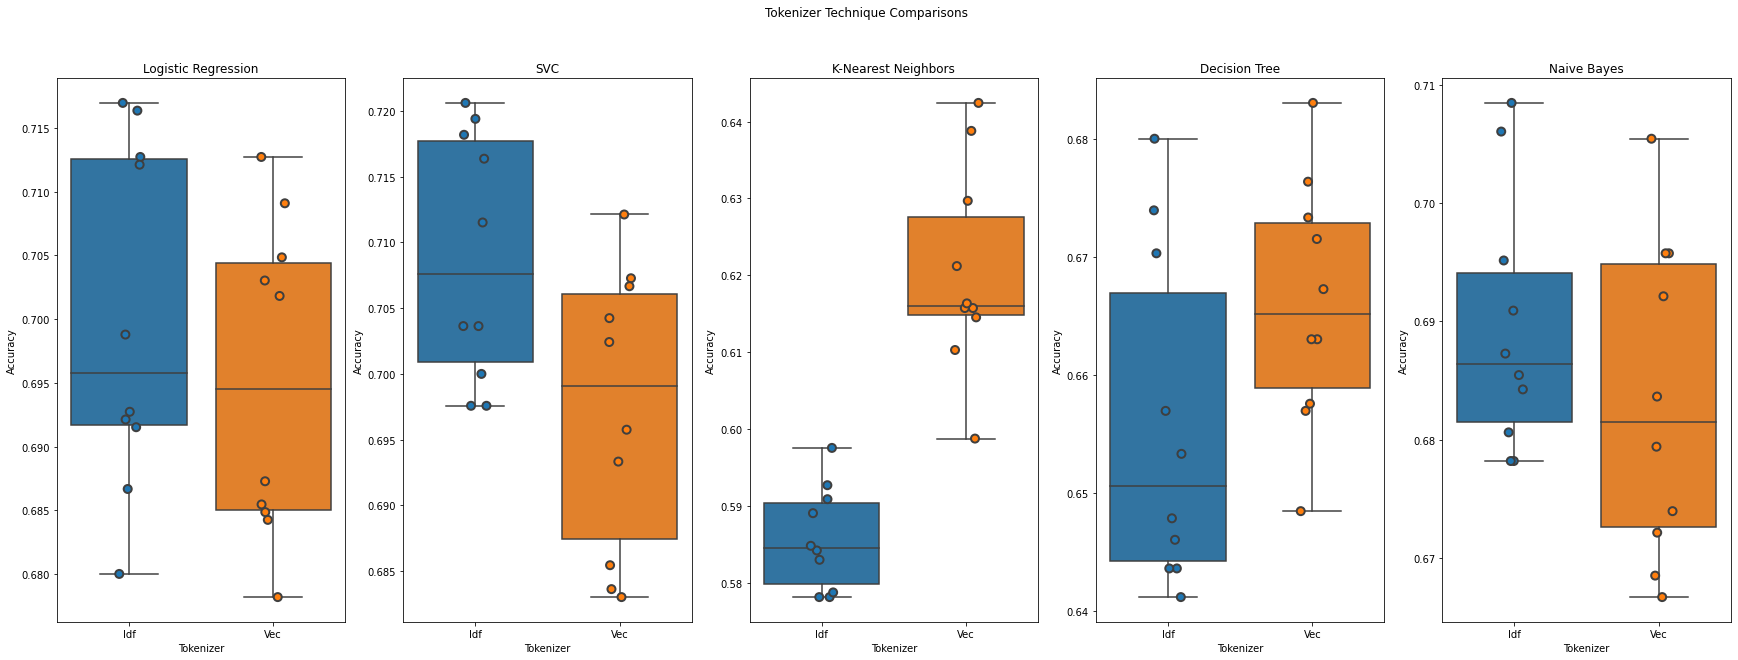

In [57]:
plt.figure(figsize = (30,10))
plt.suptitle('Tokenizer Technique Comparisons')

plt.subplot(1,5,1)
plt.title('Logistic Regression')
sns.boxplot(x='Tokenizer', y='Accuracy', data = logDF)
sns.stripplot(x='Tokenizer', y='Accuracy', data = logDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
              
plt.subplot(1,5,2)
plt.title('SVC')
sns.boxplot(x='Tokenizer', y='Accuracy', data = svcDF)
sns.stripplot(x='Tokenizer', y='Accuracy', data = svcDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.subplot(1,5,3)
plt.title('K-Nearest Neighbors')
sns.boxplot(x='Tokenizer', y='Accuracy', data = knnDF)
sns.stripplot(x='Tokenizer', y='Accuracy', data = knnDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.subplot(1,5,4)
plt.title('Decision Tree')
sns.boxplot(x='Tokenizer', y='Accuracy', data = dtDF)
sns.stripplot(x='Tokenizer', y='Accuracy', data = dtDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.subplot(1,5,5)
plt.title('Naive Bayes')
sns.boxplot(x='Tokenizer', y='Accuracy', data = nbDF)
sns.stripplot(x='Tokenizer', y='Accuracy', data = nbDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [58]:
modelMeansDF = cvIdfDF.groupby('Model Name', as_index = False).Accuracy.mean()
tempVecDF = cvVecDF.groupby('Model Name', as_index = False).Accuracy.mean()
modelMeansDF.merge(tempVecDF, 'inner', on = 'Model Name', suffixes = (' Mean IDF', ' Mean Vec'))

,Model Name,Accuracy Mean IDF,Accuracy Mean Vec
0,DecisionTreeClassifier,0.655697,0.666061
1,KNeighborsClassifier,0.585758,0.620364
2,LogisticRegression,0.700000,0.695152
3,MultinomialNB,0.689455,0.683333
4,SVC,0.708848,0.697394


In [73]:
svcIdfPreds = svcIdfNlp.predict(X_valIdf)
logVecPreds = logitVec.predict(X_valVec)

In [74]:
print(metrics.classification_report(y_valIdf, svcIdfPreds, target_names = sentTrain['sentiment'].unique()))
print(metrics.classification_report(y_valVec, logVecPreds, target_names = sentTrain['sentiment'].unique()))

              precision    recall  f1-score   support

    positive       0.69      0.72      0.71      4649
    negative       0.51      0.28      0.37      3215
     neutral       0.78      0.89      0.83      8636

    accuracy                           0.73     16500
   macro avg       0.66      0.63      0.63     16500
weighted avg       0.70      0.73      0.71     16500

              precision    recall  f1-score   support

    positive       0.68      0.70      0.69      4649
    negative       0.43      0.18      0.25      3215
     neutral       0.75      0.90      0.82      8636

    accuracy                           0.70     16500
   macro avg       0.62      0.59      0.59     16500
weighted avg       0.67      0.70      0.67     16500



In [75]:
binarySentTrain = sentTrain.copy()
binarySentTrain['sentiment'].replace({'neutral':'non-positive', 'negative':'non-positive'}, inplace = True)
binarySentTrain['label'].replace({1:0, 2:1}, inplace = True)
binarySentTrain

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,1
1,positive,Overall in hand ecpirience is quite good matt ...,1
2,positive,"1. Superb Camera,\r\n2. No lag\r\n3. This is m...",1
3,positive,Bigger size of application names doesn't allow...,1
4,non-positive,Just a hype of stock android which is not flaw...,0
...,...,...,...
49995,positive,good display..good battery...awsm perfomace..i...,1
49996,non-positive,bad phone,0
49997,non-positive,Fingerprint does not work properly,0
49998,non-positive,Bakbass phone ever. Camera quality just 2 mp c...,0


In [77]:
XBinary = binarySentTrain['text']
yBinary = binarySentTrain['label']

XBinaryIdf = sentWordsIdf.fit_transform(XBinary)
XBinaryVec = sentWordsVec.fit_transform(XBinary)

XBIdfTrain, XBIdfVal, yBIdfTrain, yBIdfVal = train_test_split(XBinaryIdf, yBinary, test_size = 0.33, random_state = 12)
XBVecTrain, XBVecVal, yBVecTrain, yBVecVal = train_test_split(XBinaryVec, yBinary, test_size = 0.33, random_state = 12)

svcBIdfNlp = SVC(C = bestCValIdfSvc, random_state = 12)
svcBIdfNlp.fit(XBIdfTrain, yBIdfTrain)
svcBIdfPreds = svcBIdfNlp.predict(XBIdfVal)

logitBVec = LogisticRegression(solver='lbfgs', C = bestCValVec, random_state = 12)
logitBVec.fit(XBVecTrain, yBVecTrain)
logBVecPreds = logitBVec.predict(XBVecVal)

print(metrics.classification_report(yBIdfVal, svcBIdfPreds, target_names = binarySentTrain['sentiment'].unique()))
print(metrics.classification_report(yBVecVal, logBVecPreds, target_names = binarySentTrain['sentiment'].unique()))

              precision    recall  f1-score   support

    positive       0.82      0.81      0.82      7864
non-positive       0.83      0.83      0.83      8636

    accuracy                           0.82     16500
   macro avg       0.82      0.82      0.82     16500
weighted avg       0.82      0.82      0.82     16500

              precision    recall  f1-score   support

    positive       0.80      0.81      0.80      7864
non-positive       0.83      0.81      0.82      8636

    accuracy                           0.81     16500
   macro avg       0.81      0.81      0.81     16500
weighted avg       0.81      0.81      0.81     16500



In [405]:
dropSentTrain = sentTrain[sentTrain.sentiment != 'neutral']
dropSentTrain['label'].replace({2:1}, inplace = True)
dropSentTrain

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,1
1,positive,Overall in hand ecpirience is quite good matt ...,1
2,positive,"1. Superb Camera,\r\n2. No lag\r\n3. This is m...",1
3,positive,Bigger size of application names doesn't allow...,1
4,negative,Just a hype of stock android which is not flaw...,0
...,...,...,...
49994,positive,This place is heavenly!!! I have dreams about ...,1
49995,positive,good display..good battery...awsm perfomace..i...,1
49996,negative,bad phone,0
49998,negative,Bakbass phone ever. Camera quality just 2 mp c...,0


In [407]:
XDrop = dropSentTrain['text']
yDrop = dropSentTrain['label']

XDropIdf = sentWordsIdf.fit_transform(XDrop)
XDropVec = sentWordsVec.fit_transform(XDrop)

XDIdfTrain, XDIdfVal, yDIdfTrain, yDIdfVal = train_test_split(XDropIdf, yDrop, test_size = 0.33, random_state = 12)
XDVecTrain, XDVecVal, yDVecTrain, yDVecVal = train_test_split(XDropVec, yDrop, test_size = 0.33, random_state = 12)

svcDIdfNlp = SVC(C = bestCValIdfSvc, random_state = 12)
svcDIdfNlp.fit(XDIdfTrain, yDIdfTrain)
svcBIdfPreds = svcDIdfNlp.predict(XDIdfVal)

logitDVec = LogisticRegression(solver='lbfgs', C = bestCValVec, random_state = 12)
logitDVec.fit(XDVecTrain, yDVecTrain)
logBVecPreds = logitDVec.predict(XDVecVal)

print(metrics.classification_report(yDIdfVal, svcBIdfPreds, target_names = dropSentTrain['sentiment'].unique()))
print(metrics.classification_report(yDVecVal, logBVecPreds, target_names = dropSentTrain['sentiment'].unique()))

              precision    recall  f1-score   support

    positive       0.84      0.79      0.81      4631
    negative       0.89      0.92      0.91      8683

    accuracy                           0.87     13314
   macro avg       0.87      0.85      0.86     13314
weighted avg       0.87      0.87      0.87     13314

              precision    recall  f1-score   support

    positive       0.85      0.74      0.79      4631
    negative       0.87      0.93      0.90      8683

    accuracy                           0.87     13314
   macro avg       0.86      0.84      0.85     13314
weighted avg       0.86      0.87      0.86     13314



In [408]:
sentTest = pd.read_csv('generic_sentiment_dataset_10k.csv')
XTest = sentTest['text']
yTest = sentTest['label']

if (os.path.exists('preRunModels/sentWordsIdf.joblib')):
    sentWordsIdf = joblib.load('preRunModels/sentWordsIdf.joblib')
else:
    sentWordsIdf = TfidfVectorizer(min_df = 75, 
                                   tokenizer = customTokenizer,
                                   ngram_range = (1,3),
                                   strip_accents = 'ascii')
    # Save the model result lists for loading in the futrure
    joblib.dump(sentWordsIdf, 'preRunModels/sentWordsIdf.joblib')
    
sentWordsIdf.fit(XTest)
XTestIdf = sentWordsIdf.transform(XTest)

testIdfDF = pd.DataFrame(columns = sentWordsIdf.get_feature_names(), data = XTestIdf.toarray())
testIdfDF['label'] = ytest
display(testIdfDF)

,1,10,15,2,2 day,20,3,4,5,6,...,without,wonder,wont,work,work properli,worst,worth,would,year,label
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
3,0.456584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503805,2
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
9996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
9997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
9998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.352619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0


In [409]:
sentTest['label'] = sentTest['sentiment'].factorize()[0]
categoryIdDF = sentTest[['sentiment', 'label']].drop_duplicates().sort_values('label')
categoryToId = dict(categoryIdDF.values)
idToCategory = dict(categoryIdDF[['label', 'sentiment']].values)

In [414]:
testText = sentTest['text'].to_numpy()
sentWordsIdf.fit(X)
testTextTokens = sentWordsIdf.transform(testText).toarray()
svcIdfNlp.fit(X_trainIdf, y_trainIdf)
testPreds = svcIdfNlp.predict(testTextTokens)

In [ ]:
for text, predicted in zip(testText, testPreds):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(idToCategory[predicted]))
  print("")